# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Imports
import numpy as np
import pandas as pd
import math
import statistics as stat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

In [0]:
# my_stats returns the mean of an array of numbers
def my_stats(lst):
  # Internal variables
  tmp = 0

  # Iterate through the parameter list
  for i in range(len(lst)):
    tmp = tmp + lst[i]

  # Calculate the mean of lst
  tmp_mean = tmp/len(lst)

  # Iterate again to calculate the list's variance
  tmp_itms = 0
  for j in range(len(lst)):
    tmp_itms = tmp_itms + (lst[j]**2)

  tmp_var = tmp_itms/len(lst) - (tmp_mean**2)

  # Calculate the standard deviation
  tmp_std = math.sqrt(tmp_var)

  # Construct a return object
  return {"mean": tmp_mean, "variance": tmp_var, "std": tmp_std}

In [36]:
# Set up data and invoke the my_stats function
dat_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
my_vals = my_stats(dat_sales)

print(f'Mean of dat_sales is: {round(my_vals["mean"], 2)} vs. library formula: {round(stat.mean(dat_sales), 2)}')
print(f'Variance of dat_sales is: {round(my_vals["variance"], 2)} vs. library formula: {round(stat.pvariance(dat_sales), 2)}')
print(f'Standard Deviation of dat_sales is: {round(my_vals["std"], 2)} vs. library formula: {round(stat.pstdev(dat_sales), 2)}')


Mean of dat_sales is: 3052.71 vs. library formula: 3052.71
Variance of dat_sales is: 183761.06 vs. library formula: 183761.06
Standard Deviation of dat_sales is: 428.67 vs. library formula: 428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [37]:
# Construct a list of customer numbers
dat_customers = [127, 80, 105, 92, 120, 115, 93]

# Calculate the variance/covariance matrix of sales vs. customers
dat_cov_sales_cust = np.cov(dat_sales, dat_customers, ddof=0)[0][1]

print(f'The covariance between sales and customers for the week is: {round(dat_cov_sales_cust, 2)}')

The covariance between sales and customers for the week is: 6518.02


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [116]:
# Calculate the standard deviation of sales and customers
std_sales = my_stats(dat_sales)["std"]
std_customers = my_stats(dat_customers)["std"]

# Calculate the correlation coefficient of sales and customers
r_corr_coeff = dat_cov_sales_cust/(std_sales*std_customers)
print(f'Correlation Coefficient between sales and customers is: {round(r_corr_coeff, 4)}')


Correlation Coefficient between sales and customers is: 0.9628


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [117]:
# Read in the Titanic dataset
df_titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

# Describe the dataset and then generate a dataframe with only numeric attributes
print(df_titanic.describe())
df_ttn_numeric = df_titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'has_cabin_number']]

# Generate the variance/covariance matrix
print(f'Titanic Dataset Covariance Matrix')
df_ttn_numeric.cov()

        Unnamed: 0       pclass  ...        body  has_cabin_number
count  1310.000000  1309.000000  ...  121.000000       1310.000000
mean    655.500000     2.294882  ...  160.809917          0.225191
std     378.308736     0.837836  ...   97.696922          0.417867
min       1.000000     1.000000  ...    1.000000          0.000000
25%     328.250000     2.000000  ...   72.000000          0.000000
50%     655.500000     3.000000  ...  155.000000          0.000000
75%     982.750000     3.000000  ...  256.000000          0.000000
max    1310.000000     3.000000  ...  328.000000          1.000000

[8 rows x 9 columns]
Titanic Dataset Covariance Matrix


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [118]:
# Generate the correlation matrix
print(f'Titanic Dataset Correlation Matrix')
df_ttn_numeric.corr()

Titanic Dataset Correlation Matrix


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

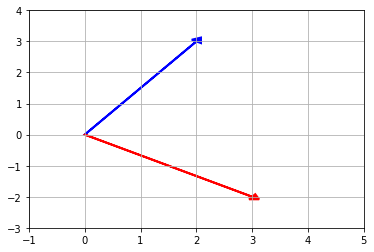

In [119]:
# Construct two orthogonal (otherwise referred to as perpindicular)
v1 = [2, 3]
v2 = [3, -2]

# Define a two dimensional plot
fig_ab, ax = plt.subplots()
ax.grid()
plt.xlim(-1, 5)
plt.ylim(-3, 4)

# Define an arrow object for 'v1'
plt.arrow(0,0, 
          v1[0],
          v1[1],
          head_width  = 0.2,
          head_length = 0.15,
          linewidth = 2,
          color = 'blue')

# Define an arrow object for 'v2'
plt.arrow(0,0, 
          v2[0],
          v2[1],
          head_width  = 0.2,
          head_length = 0.15,
          linewidth = 2,
          color = 'red')

plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [120]:
# Represent vector a and vector b
va = [-5, 3, 7]
vb = [6, -8, 2]

# Compute the dot product - is the dot product = 0?
np.dot(va, vb)


-40

### Discussion

* The dot product of vector a and vector b does not equal zero
    * The vectors are **not** orthogonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
vc = [2, -15, 6, 20]

In [131]:
# Calculate the square of the norm of c
print(f'The square of vector c\'s norm is: {(LA.norm(vc)**2)}')

# Calculate dot product of vector c with itself
print(f'The dot product of vector c is: {np.dot(vc, vc)}')

# Calculate the dot product of the transpose of vector c and vector c
print(f'The dot product of vector c transposition and vector c is: {np.dot(np.transpose(vc), vc)}')

The square of vector c's norm is: 665.0
The dot product of vectorc is: 665
The dot product of vector c transposition and vector c is: 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}



\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [10]:
# Represent vector f as a list
v_f = [4, 12, 11, 9, 2]

# Generate vector f's unit vector by dividing vector f by its norm
v_f_hat = v_f/np.linalg.norm(v_f)
print(f'Unit vector of v_f_hat is: {v_f_hat}')

# Check: determine the magnitude of the unit vector
v_f_hat_norm = np.linalg.norm(v_f_hat)
print(f'Is the magnitude of v_f_hat = 1?: {v_f_hat_norm}')

Unit vector of v_f_hat is: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
Is the magnitude of v_f_hat = 1?: 0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Define a vector
vect_lin_a = [-3, 2]
# Multiply vector a by a scalar
vect_lin_b = np.multiply(vect_lin_a, 1.5)

[]

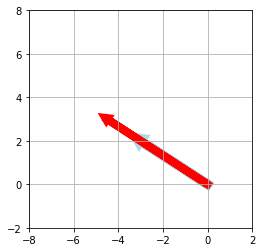

In [20]:
# Plot vector a and vector b
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-8, 2)
plt.ylim(-2, 8)

# Construct vector a as a graphical arrow
plt.arrow(0,0,
          vect_lin_a[0],
          vect_lin_a[1],
          head_width=.2,
          head_length=0.2,
          linewidth=10,
          color='lightblue')

# Construct vector b as a graphical arrow
plt.arrow(0,0,
          vect_lin_b[0],
          vect_lin_b[1],
          head_width=.1,
          head_length=0.1,
          linewidth=8,
          color='red')

plt.plot()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

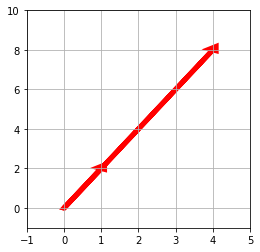

In [21]:
# Represent vector g and vector ha as numpy arrays
vect_g = np.array([1, 2])
vect_h = np.array([4, 8])

# Construct plot of the vectors
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-1, 5)
plt.ylim(-1, 10)

for vct in [vect_g, vect_h]:
  plt.arrow(0, 0,
            vct[0],
            vct[1],
            head_width=.2,
            head_length=.2,
            linewidth=5,
            color='red')

### Discussion

The span of vector g and vector h is the set of all points on the line that runs through the points: (1, 2) and (4, 8)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

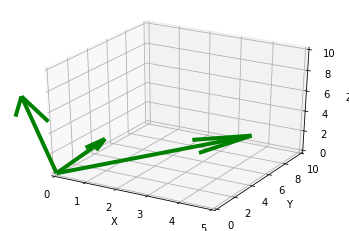

In [29]:
# Construct vector l, m, and n as numpy arrays
vctr_l = np.array([[0,0,0,  1,2,3]])
vctr_m = np.array([[0,0,0, -1,0,7]])
vctr_n = np.array([[0,0,0,  4,8,2]])

# Create plot object
fg_3D = plt.figure()
ax = fg_3D.add_subplot(111, projection='3d')
for vctr in [vctr_l, vctr_m, vctr_n]:
  X, Y, Z, U, V, W = zip(*vctr)
  ax.quiver(X, Y, Z, U, V, W, length=1, color='green', linewidth=4)

ax.set_xlim([0, 5])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


### Discussion

The span of the three dimensional vector {l, m, n} is the cube like space bounded by the vectors

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



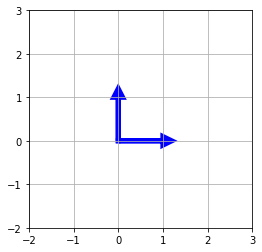

In [31]:
# Construct the standard basis vectors
vect_bx = np.array([0, 1])
vect_by = np.array([1, 0])

# Create plot object
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-2, 3)
plt.ylim(-2, 3)

for vct in [vect_bx, vect_by]:
  plt.arrow(0, 0,
            vct[0],
            vct[1],
            head_width=.2,
            head_length=.2,
            linewidth=5,
            color='blue')

### Discussion

Two vectors that form the basis of two dimensional space are the standard basis vectors: [1, 0] and [0, 1] graphed above.

## 6.2 What does it mean to form a basis?

### Discussion

Basis vectors of a vector space V exist if they are linearly indepedent and can form a linear combination of every vector in V.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [32]:
# Construct matrix P as a numpy array
mtx_P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
# Generate the rank of matrix P
print(f'The rank of matrix P is: {np.linalg.matrix_rank(mtx_P)}')

The rank of matrix P is: 3


## 7.2 What does the rank of a matrix tell us?

### Discussion

The rank of a matrix tells the dimension space of the matrix's columns.  It is the max number of the linearly indepedent columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

[]

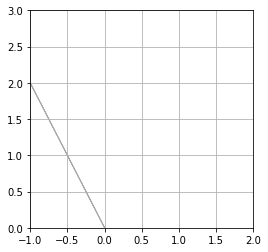

In [45]:
# Create a list representing vector w
vect_w = [-1, 2]

# Plot vector w
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1, 2)
plt.ylim(0, 3)

# Construct vector a as a graphical arrow
plt.arrow(0,0,
          vect_w[0],
          vect_w[1],
          linewidth=1,
          color='darkgray')

plt.plot()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

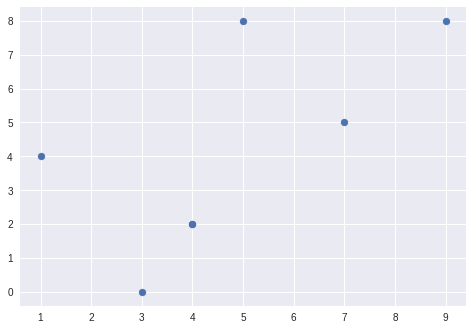

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()